<a href="https://colab.research.google.com/github/joannakonieczny/ILO_projekt_Eurowizja/blob/main/ILO_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Eurowizja: aby na pewno nie stronnicza?**

**Autorzy:**

Joanna Konieczny, Wojciech Łabędź, Julia Strużyńska, Oliwia Szewczyk

***Słowny opis problemu:***
Naszym celem jest znalezienie podobieństw w głosowaniach różnych państw na Eurowizji, zarówno wśród jurorów, jak i telewidzów.

***Wstępna hipoteza:***  Chcemy za pomocą odpowiedniej filtracji odnaleźć nietypowe tendencje związane z głosowaniem poszczególnych państw, by w ten sposób dowiedzieć się, czy telewidzowie i jurorzy biorą pod uwagę prywatne sympatie podczas wybierania uczestnika, na którego zagłosują. Badamy istnienie takich korelacji. Porównamy je również z zależnościami zauważonymi przez innych badaczy tego zjawiska.

***Opis danych:***
Dane pozyskaliśmy z oficjalnej strony Eurowizji. W związku ze zmianą systemu oceniania, analizowaliśmy finały konkursów od roku 2016 do 2019. Chmurę punktów w naszej analizie stanowi państwo, które głosowało w danym finale. W każdej chmurze znajdzie się dokładnie 10 punktów. Ich współrzędnymi są numer państwa (od 1 do 52, zgodnie z poniższą tabelą) oraz punkty, jakie otrzymało od jury głosującego państwa lub telewidzów (należących do zbioru [1, 2, 3, 4, 5, 6, 7, 8, 10, 12]).

***Tabela***

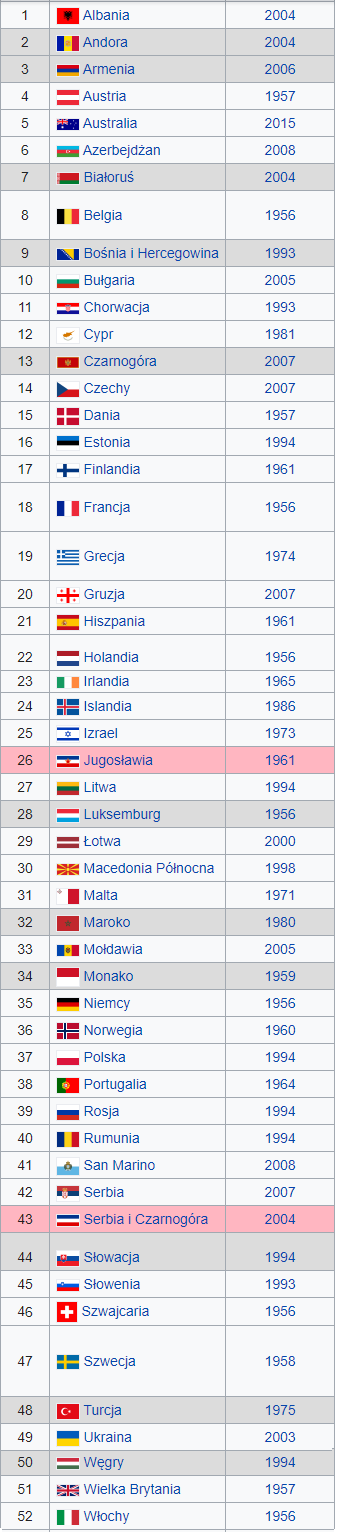

# ***Proces filtracji***

Filtracją, na którą się zdecydowaliśmy i którą się inspirowaliśmy, była ta opisana w artykule D. Gatherera z 2006 roku. Zakładała ona porównywanie rzeczywistych wyników Eurowizji z wynikami symulowanego konkursu. Opiera się ona na:

1.   Przeprowadzeniu symulacji Monte Carlo dla analizowanych lat, biorąc pod uwagę prawdopodobieństwo otrzymania punktów od głosujących państw
2.   Ustaleniu progu punktowego, dla którego można odnotować przychylność jednych państw do drugich
3.   Porównaniu średniej wszystkich przyznanych przez dane państwo punktów do progu
4.   Wyeliminowaniu tych powstałych połączeń między państwami, które nie mają wpływu na ostateczny wynik

Wyniki naszej analizy postanowiliśmy przedstawić w formie grafu.





# Obróbka danych

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()


In [ ]:
#dict do dekodowania współrzędnych
participants = {"Albania": 1, "Armenia":3, "Austria":4, "Australia":5, "Azerbejdżan": 6, "Białoruś":7, "Belgia":8, "BIH":9,
          "Bułgaria": 10, "Chorwacja":11, "Cypr": 12, "Czarnogóra": 13, "Czechy": 14, "Dania": 15, "Estonia": 16, 
          "Finlandia": 17, "Francja": 18, "Grecja": 19, "Gruzja": 20, "Hiszpania": 21, "Holandia": 22, "Irlandia": 23, 
          "Islandia":24, "Izrael": 25, "Litwa":27, "Łotwa": 29, "Macedonia Płn.":30, "Malta":31, "Mołdawia": 33, 
          "Niemcy":35, "Norwegia":36, "Polska": 37, "Portugalia":38, "Rosja": 39, "Rumunia": 40, "San Marino": 41, 
          "Serbia": 42, "Słowenia": 45, "Szwajcaria": 46, "Szwecja": 47, "Ukraina": 49, "Węgry": 50, "Wlk. Brytania": 51, 
          "Włochy":52}

reversed_participants = dict(map(reversed, participants.items()))

points = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12]

In [ ]:
file_names = ["2016_Albania_J", "2016_Albania_T", "2016_Armenia_J", "2016_Armenia_T", "2016_Australia_J", "2016_Australia_T", "2016_Austria_J", "2016_Austria_T", "2016_Azerbejdzan_J",
              "2016_Azerbejdzan_T", "2016_Belgia_J", "2016_Belgia_T" ,"2016_Bialorus_J", "2016_Bialorus_T", "2016_BIH_J", "2016_BIH_T", "2016_Bulgaria_J", "2016_Bulgaria_T",
              "2016_Chorwacja_J", "2016_Chorwacja_T", "2016_Cypr_J", "2016_Cypr_T", "2016_Czarnogora_J", "2016_Czarnogora_T", "2016_Czechy_J", "2016_Czechy_T", "2016_Dania_J",
              "2016_Dania_T", "2016_Estonia_J", "2016_Estonia_T", "2016_Finlandia_J", "2016_Finlandia_T", "2016_Francja_J", "2016_Francja_T", "2016_Grecja_J", "2016_Grecja_T",
              "2016_Gruzja_J", "2016_Gruzja_T", "2016_Hiszpania_J", "2016_Hiszpania_T", "2016_Holandia_J", "2016_Holandia_T", "2016_Irlandia_J", "2016_Irlandia_T", "2016_Islandia_J",
              "2016_Islandia_T", "2016_Izrael_J", "2016_Izrael_T", "2016_Litwa_J", "2016_Litwa_T", "2016_Lotwa_J", "2016_Lotwa_T", "2016_Macedonia_J", "2016_Macedonia_T",
              "2016_Malta_J", "2016_Malta_T", "2016_Moldawia_J", "2016_Moldawia_T", "2016_Niemcy_J", "2016_Niemcy_T", "2016_Norwegia_J", "2016_Norwegia_T", "2016_Polska_J", 
              "2016_Polska_T", "2016_Rosja_J", "2016_Rosja_T", "2016_Serbia_J", "2016_Serbia_T", "2016_Slowenia_J", "2016_Slowenia_T", "2016_SM_J", "2016_SM_T", "2016_Szwajcaria_J",
              "2016_Szwajcaria_T", "2016_Szwecja_J", "2016_Szwecja_T", "2016_Ukraina_J", "2016_Ukraina_T", "2016_WB_J", "2016_WB_T", "2016_Wegry_J", "2016_Wegry_T", "2016_Włochy_J",
              "2016_Włochy_T", "2016_wyniki", "2017_Albania_J", "2017_Albania_T", "2017_Armenia_J", "2017_Armenia_T", "2017_Australia_J", "2017_Australia_T", "2017_Austria_J", 
              "2017_Austria_T", "2017_Azerbedzan_J","2017_Azerbedzan_T", "2017_Belgia_J", "2017_Belgia_T", "2017_Bialorus_J", "2017_Bialorus_T", "2017_Bulgaria_J", "2017_Bulgaria_T", "2017_Chorwacja_J", 
              "2017_Chorwacja_T", "2017_Cypr_J", "2017_Cypr_T", "2017_Czarnogora_J", "2017_Czarnogora_T", "2017_Czechy_J", "2017_Czechy_T", "2017_Dania_J", "2017_Dania_T",
              "2017_Estonia_J", "2017_Estonia_T", "2017_Finlandia_J", "2017_Finlandia_T", "2017_Francja_J", "2017_Francja_T", "2017_Grecja_J", "2017_Grecja_T", "2017_Gruzja_J",
              "2017_Gruzja_T", "2017_Hiszpania_J", "2017_Hiszpania_T", "2017_Holandia_J", "2017_Holandia_T", "2017_Irlandia_J", "2017_Irlandia_T", "2017_Islandia_J", 
              "2017_Islandia_T", "2017_Izrael_J", "2017_Izrael_T", "2017_Litwa_J", "2017_Litwa_T", "2017_Lotwa_J", "2017_Lotwa_T", "2017_Macedonia_J", "2017_Macedonia_T",
              "2017_Malta_J", "2017_Malta_T", "2017_Moldawia_J", "2017_Moldawia_T", "2017_Niemcy_J", "2017_Niemcy_T", "2017_Norwegia_J", "2017_Norwegia_T", "2017_Polska_J", 
              "2017_Polska_T", "2017_Portugalia_J", "2017_Portugalia_T", "2017_Rumunia_J", "2017_Rumunia_T", "2017_Serbia_J", "2017_Serbia_T", "2017_Slowenia_J", "2017_Slowenia_T",
              "2017_SM_J", "2017_SM_T", "2017_Szwajcaria_J", "2017_Szwajcaria_T", "2017_Szwecja_J", "2017_Szwecja_T", "2017_UK_J", "2017_UK_T", "2017_Ukraina_J", "2017_Ukraina_T",
              "2017_Wegry_J", "2017_Wegry_T", "2017_Wlochy_J", "2017_Wlochy_T", "2017_wyniki", "2018_Albania_J", "2018_Albania_T", "2018_Armenia_J", "2018_Armenia_T", 
              "2018_Australia_J", "2018_Australia_T", "2018_Austria_J", "2018_Austria_T", "2018_Azerbejdzan_J", "2018_Azerbejdzan_T", "2018_Belgia_J", "2018_Belgia_T", 
              "2018_Bialorus_J", "2018_Bialorus_T", "2018_Bulgaria_J", "2018_Bulgaria_T", "2018_Chorwacja_J", "2018_Chorwacja_T", "2018_Cypr_J", "2018_Cypr_T", "2018_Czarnogora_J",
              "2018_Czarnogora_T", "2018_Czechy_J", "2018_Czechy_T", "2018_Dania_J", "2018_Dania_T", "2018_Estonia", "2018_Estonia_T", "2018_Finlandia_J", "2018_Finlandia_T",
              "2018_Francja_J", "2018_Francja_T", "2018_Grecja_J", "2018_Grecja_T", "2018_Gruzja_J", "2018_Gruzja_T", "2018_Hiszpania_J", "2018_Hiszpania_T", "2018_Holandia_J",
              "2018_Holandia_T", "2018_Irlandia_J", "2018_Irlandia_T", "2018_Islandia_J", "2018_Islandia_T", "2018_Izrael_J", "2018_Izrael_T", "2018_Litwa_J", "2018_Litwa_T",
              "2018_Lotwa_J", "2018_Lotwa_T", "2018_MacedoniaPolnocna_J", "2018_MacedoniaPolnocna_T", "2018_Malta_J", "2018_Malta_T", "2018_Moldawia_J", "2018_Moldawia_T", 
              "2018_Niemcy_J", "2018_Niemcy_T", "2018_Norwegia_J", "2018_Norwegia_T", "2018_Polska_J", "2018_Polska_T", "2018_Portugalia_J", "2018_Portugalia_T", "2018_Rosja_J",
              "2018_Rosja_T", "2018_Rumunia_J", "2018_Rumunia_T", "2018_SanMarino_J", "2018_SanMarino_T", "2018_Serbia_J", "2018_Serbia_T", "2018_Slowenia_J", "2018_Slowenia_T",
              "2018_Szwajcaria_J", "2018_Szwajcaria_T", "2018_Szwecja_J", "2018_Szwecja_T", "2018_Ukraina_J", "2018_Ukraina_T", "2018_Wegry_J", "2018_Wegry_T", 
              "2018_WielkaBrytania_J", "2018_WielkaBrytania_T", "2018_Wlochy_J", "2018_Wlochy_T", "2018_Wyniki", "2019_Albania_J", "2019_Albania_T", "2019_Armenia_J", 
              "2019_Armenia_T", "2019_Australia_J", "2019_Australia_T", "2019_Austria_J", "2019_Austria_T", "2019_Azerbejdżan_J", "2019_Azerbejdżan_T", "2019_Belgia_J", 
              "2019_Belgia_T", "2019_Białoruś_J", "2019_Białoruś_T", "2019_Chorwacja_J", "2019_Chorwacja_T", "2019_Cypr_J", "2019_Cypr_T", "2019_Czarnogóra_J", "2019_Czarnogóra_T",
              "2019_Czechy_J", "2019_Czechy_T", "2019_Dania_J", "2019_Dania_T", "2019_Estonia_J", "2019_Estonia_T", "2019_Finandia_J", "2019_Finlandia_T", "2019_Francja_J",
              "2019_Francja_T", "2019_Grecja_J", "2019_Grecja_T", "2019_Gruzja_J", "2019_Gruzja_T", "2019_Hiszpania_J", "2019_Hiszpania_T", "2019_Holandia_J", "2019_Holandia_T",
              "2019_Irlandia_J", "2019_Irlandia_T", "2019_Islandia_J", "2019_Islandia_T", "2019_Izrael_J", "2019_Izrael_T", "2019_Litwa_J", "2019_Litwa_T", "2019_Łotwa_J",
              "2019_Łotwa_T", "2019_Macedonia_Północna_J", "2019_Macedonia_Północna_T", "2019_Malta_J", "2019_Malta_T", "2019_Mołdawia_J", "2019_Mołdawia_T", "2019_Niemcy_J", 
              "2019_Niemcy_T", "2019_Norwegia_J", "2019_Norwegia_T", "2019_Polska_J", "2019_Polska_T", "2019_Portugalia_J", "2019_Portugalia_T", "2019_Rosja_J", "2019_Rosja_T",
              "2019_Rumunia_J", "2019_Rumunia_T", "2019_San_Marino_J", "2019_San_Marino_T", "2019_Serbia_J", "2019_Serbia_T", "2019_Słowenia_J", "2019_Słowenia_T", 
              "2019_Szwajcaria_J", "2019_Szwajcaria_T", "2019_Szwecja_J", "2019_Szwecja_T", "2019_Węgry_J", "2019_Węgry_T", "2019_Wielka_Brytania_J", "2019_Wielka_Brytania_T",
              "2019_Włochy_J", "2019_Włochy_T", "2019_wyniki" ]

data_J = {"Albania": [], "Armenia": [], "Austria": [], "Australia": [], "Azerbejdżan": [], "Białoruś":[], "BIH": [], "Belgia":[], 
          "Bułgaria": [], "Chorwacja": [], "Cypr": [], "Czarnogóra": [], "Czechy": [], "Dania": [], "Estonia": [], 
          "Finlandia": [], "Francja": [], "Grecja": [], "Gruzja": [], "Hiszpania": [], "Holandia": [], "Irlandia": [], 
          "Islandia":[], "Izrael": [], "Litwa":[], "Łotwa": [], "Macedonia Płn.": [], "Malta": [], "Mołdawia": [], 
          "Niemcy": [], "Norwegia": [], "Polska": [], "Portugalia": [], "Rosja": [], "Rumunia": [], "San Marino": [], 
          "Serbia": [], "Słowenia": [], "Szwajcaria": [], "Szwecja": [], "Ukraina": [], "Węgry": [], "Wlk. Brytania": [], 
          "Włochy":[]}
data_T = {"Albania": [], "Armenia": [], "Austria": [], "Australia": [], "Azerbejdżan": [], "Białoruś":[], "BIH": [], "Belgia":[], 
          "Bułgaria": [], "Chorwacja": [], "Cypr": [], "Czarnogóra": [], "Czechy": [], "Dania": [], "Estonia": [], 
          "Finlandia": [], "Francja": [], "Grecja": [], "Gruzja": [], "Hiszpania": [], "Holandia": [], "Irlandia": [], 
          "Islandia":[], "Izrael": [], "Litwa":[], "Łotwa": [], "Macedonia Płn.": [], "Malta": [], "Mołdawia": [], 
          "Niemcy": [], "Norwegia": [], "Polska": [], "Portugalia": [], "Rosja": [], "Rumunia": [], "San Marino": [], 
          "Serbia": [], "Słowenia": [], "Szwajcaria": [], "Szwecja": [], "Ukraina": [], "Węgry": [], "Wlk. Brytania": [], 
          "Włochy":[]}

for name in file_names:
   x = uploaded[name+".txt"].decode("utf-8").split("\r\n")
   for i in range(10):
     x[i] = x[i].split(" ")
     x[i][0] = int(x[i][0])
     x[i][1] = int(x[i][1])
   #x.insert(0, name[5:-2])
   country = name[5:-2]
   if country == 'Azerbejdzan' or country == 'Azerbedzan':country = 'Azerbejdżan'
   if country == 'Bialorus':country = 'Białoruś'
   if country == 'Bulgaria':country = 'Bułgaria'
   if country == 'Czarnogora':country = 'Czarnogóra'
   if country == 'Lotwa':country = 'Łotwa'
   if country == 'Macedonia'or country =='MacedoniaPolnocna'or country =='Macedonia_Północna':country = 'Macedonia Płn.'
   if country == 'Moldawia':country = 'Mołdawia'
   if country == 'Slowenia':country = 'Słowenia'
   if country == 'SM'or country =='SanMarino'or country =='San_Marino':country = 'San Marino'
   if country == 'WB' or country =='WielkaBrytania' or country =='UK'or country =='Wielka_Brytania':country = 'Wlk. Brytania'
   if country == 'Bulgaria':country = 'Bułgaria'
   if country == 'Wegry':country = 'Węgry'
   if country == 'Wlochy':country = 'Włochy'
   if country == 'Finandia':country = 'Finlandia'
   #print(country)
   if name[-1] == 'J': data_J[country].extend(x)
   if name[-1] == 'T':data_T[country].extend(x) 


# Obliczenie wyników "idealnego konkursu"

"Idealny konkurs" rozumiemy tutaj jako konkurs, w którym nie uwzględnia się relacji międzynarodowych. W tym przypadku prawdopodobieństwo otrzymania punktów należących do zbioru [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12] jest jednakowe dla każdego państwa.

<BarContainer object of 11 artists>

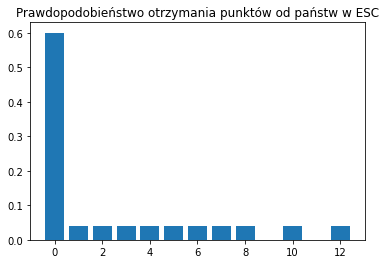

In [ ]:
def nonbiased_points2():
    p_non_zero = 1/(25)
    p_zero     = (15)/(25)
    percents  = np.append([p_zero],np.full((10), p_non_zero))
    return (points, percents)
     
#vote_values, vote_prob = nonbiased_points2(num_of_participants)
vote_values, vote_prob = nonbiased_points2()
plt.title("Prawdopodobieństwo otrzymania punktów od państw w ESC")
plt.bar(vote_values, vote_prob)

# Symulacja Monte Carlo

W tym kroku filtracji przeprowadzamy serię "idealnych konkursów" w celu wygenerownia wyników dla każdego państwa. 5% najwyższych wyników będzie stanowić próg, względem którego będziemy warunkować istnienie relacji między państwami.

In [ ]:
#funkcja do przeprowadzenia symulacji Monte Carlo
def simulate_voting(start_year,end_year,simulations):
    mean_dist = []
    for i in range(simulations):
        print("\r Similation: "+str(i)+" of "+str(simulations), end = "")
        votes = []

        for year in np.arange(start_year,end_year,1):

            vote_values,vote_proba = nonbiased_points2()    # get vote probability distribution for current year
            vote_proba = np.asarray(vote_proba).astype('float64')
            vote_proba /= np.sum(vote_proba)
            vote_sample = np.random.choice(vote_values, 1, p=vote_proba) # sample from distribution
            votes.append(vote_sample)   # append sample to list

        mean_sample = np.mean(votes)    
        mean_dist.append(mean_sample)
        
    return(mean_dist)

 Similation: 999999 of 1000000

(array([3.53289e+05, 2.27589e+05, 1.55170e+05, 1.42935e+05, 5.57330e+04,
        4.13190e+04, 1.83130e+04, 3.65000e+03, 1.76000e+03, 2.42000e+02]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

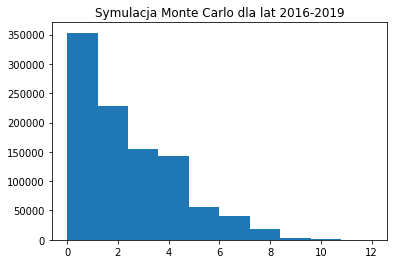

In [ ]:
# Monte Carlo implementacja
test_dist = simulate_voting(2016,2019,1000000)
plt.title("Symulacja Monte Carlo dla lat 2016-2019")
plt.hist(test_dist)


In [ ]:
# wyznaczenie wartości, od której zaczyna się 5% najwyższych punktów
average = np.percentile(test_dist, 95)
#print(average)

# Przeprowadzenie filtracji w oparciu o wyniki symulacji

Pierwszym krokiem będzie przypisanie państwu całkowitej sumy punktów, jaką przyznał w rozpatrywanych latach innym państwom. Suma ta ma formę tablicy o 52 współrzędnych. Do każdego elementu dodajemy punkty zgodne z tymi opisanymi w chmurach.

In [ ]:
# tablica z punktami jurorów
t_J = {}

for key in data_J:
  punkty = []
  #print(data_J[key])
  for i in range(52):
    punkty.append(0)
  for k in data_J[key]:
      if len(k) > 1: punkty[k[0]-1] += k[1]
  t_J[key] = punkty

#tablica z punktami telewidzów
t_T = {}

for key in data_T:
  punkty = []
  #print(data_J[key])
  for i in range(52):
    punkty.append(0)
  for k in data_T[key]:
      if len(k) > 1: punkty[k[0]-1] += k[1]
  t_T[key] = punkty


#print(t_J)
#print(t_T)

Następnie każdy element obu tablic dzielmy przez liczbę rozpatrywanych konkursów

In [ ]:
#nowa tablica z punktami jurorów
{}

for el in t_J: 
  for i in range(52): 
    med = t_J[el][i]
    med /= 4
    t_J[el][i] = med
#print(t_J)    

#nowa tablica z punktami telewidzów
for el in t_T: 
  for i in range(52): 
    med = t_T[el][i]
    med /= 4
    t_T[el][i] = med
#print(t_T) 

Kolejnym krokiem naszej filtracji jest ograniczenie przyznanych punktów. Uwzględniamy tylko te należące do 5% najwyższych z symulacji.

In [ ]:
#ograniczenie punktów jurorów

#print(t_J)
graph_data_J = []

for el in t_J: 
  for i in range(52): 
    if t_J[el][i] > average and i+1 in reversed_participants:
      #print("From ", el ," to ",reversed_participants[i+1] ,": ", t_J[el][i] ," points", )
      graph_data_J.append([el,reversed_participants[i+1]])

#print(graph_data_J)

#ograniczenie punktów telewidzów
#print(t_T) 

graph_data_T = []

for el in t_T: 
  for i in range(52): 
    if t_T[el][i] > average and i+1 in reversed_participants:
      graph_data_T.append([el,reversed_participants[i+1]])

#print(graph_data_T)

Powyższa filtracja daje nam jednak tylko wyniki jednostronne (tj. jedno państwo przyznało wyższą liczbę punktów drugiemu, bez uwzględnienia przyznania punktów przez drugie państwo. Co prawda może to oznaczać chęć przypodobania się drugiemu państwu, jednak można to też interpretować jako głosowanie strategiczne, na ulubiony występ). Dlatego trzeba zweryfikować liczbę wykrytych relacji, usuwając te jednostronne.

In [ ]:
# jury

for element in graph_data_J:
  if [element[1], element[0]] not in graph_data_J:
    graph_data_J.remove(element)

#telewidzowie

for element in graph_data_T:
  if [element[1], element[0]] not in graph_data_T:
    graph_data_T.remove(element)

# Przedstawienie wyników w postaci grafów

Ostatnim elementem analizy jest graficzne przedstawienie wyników filtracji.

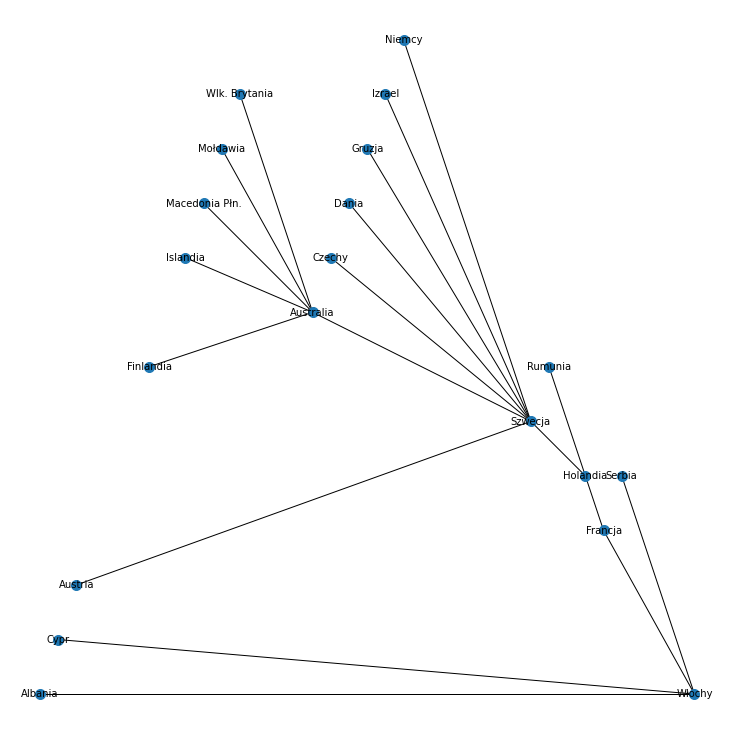

In [ ]:
import networkx as nx

#jury

df_J = pd.DataFrame.from_records(graph_data_J)

G = nx.from_pandas_edgelist(df_J, source=0, target=1)
pos = nx.spring_layout(G)
#nx.draw(G, with_labels=True, node_size= 100)
plt.figure(3,figsize=(10,10)) 
nx.draw_planar(G, with_labels=True,font_size=10, node_size= 100)
plt.show()



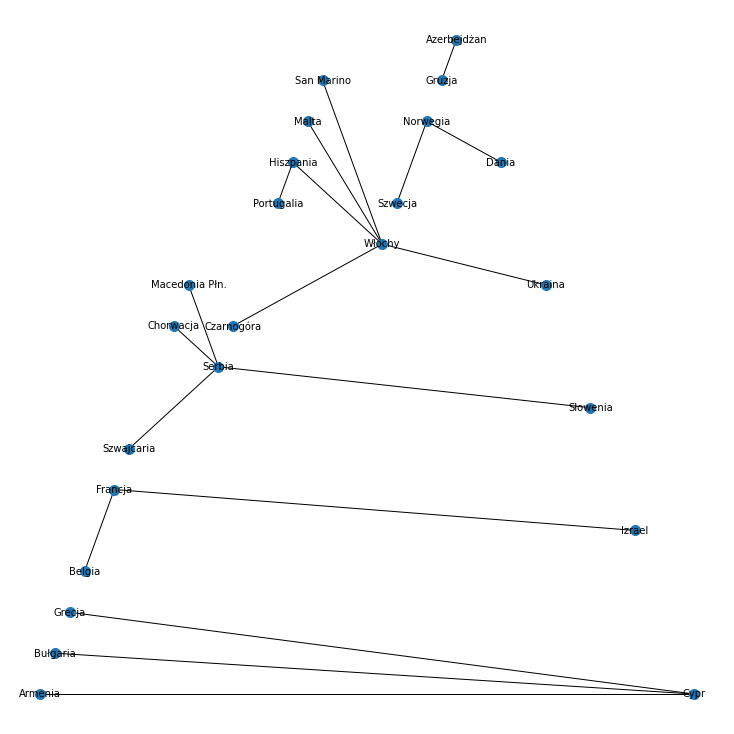

In [ ]:
#telewidzowie
import pandas as pd

df_T = pd.DataFrame.from_records(graph_data_T)

G_T = nx.from_pandas_edgelist(df_T, source=0, target=1)
pos = nx.spring_layout(G_T)
#nx.draw(G, with_labels=True, node_size= 100)
plt.figure(3,figsize=(10,10)) 
nx.draw_planar(G_T, with_labels=True,font_size=10, node_size= 100)
plt.show()


W grafie przedstawiającym wyniki dla jury wykonamy kolejną operację, mającą na celu zliczenie wszystkich połączeń między państwami tak, aby wykryć jednoznaczne sieci sojuszy. Wykorzystamy do tego algorytm Girvana-Newmana, który służy do wyznaczania tzw. communities w grafach. Przeprowadziliśmy dodatkowo metodę Louvain. Nie jest to krok konieczny dla grafu telewidzów, ponieważ tam sieci zarysowane są dość wyraźnie.

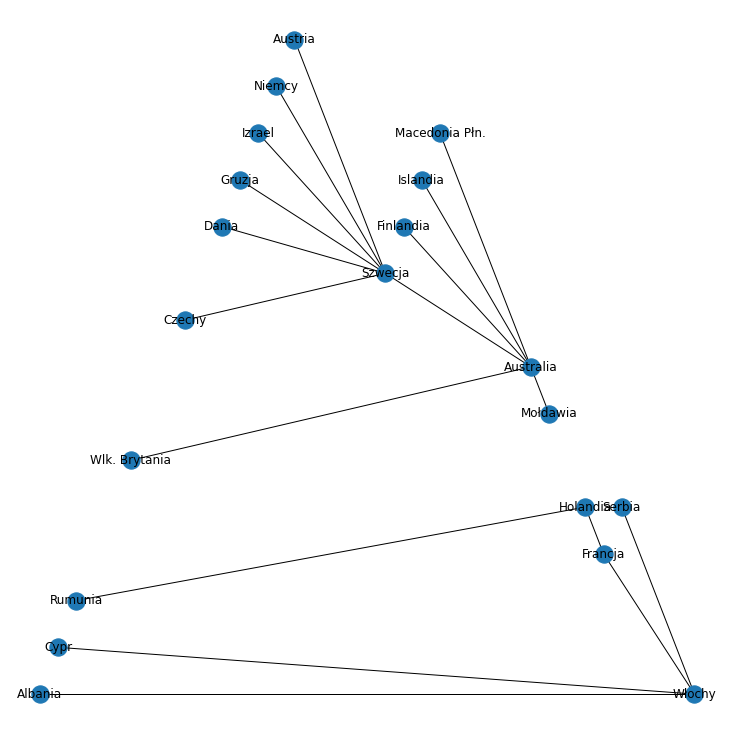

In [ ]:
#Girvan-Newman dla jury

iterations_J = 11

for i in range(iterations_J):
    btw_J = sorted(nx.edge_betweenness_centrality(G).items(), key = lambda pair:-pair[1])
    edge_to_delete = btw_J[0][0]

G.remove_edge(*edge_to_delete)

plt.figure(3,figsize=(10,10)) 
nx.draw_planar(G, with_labels = True)

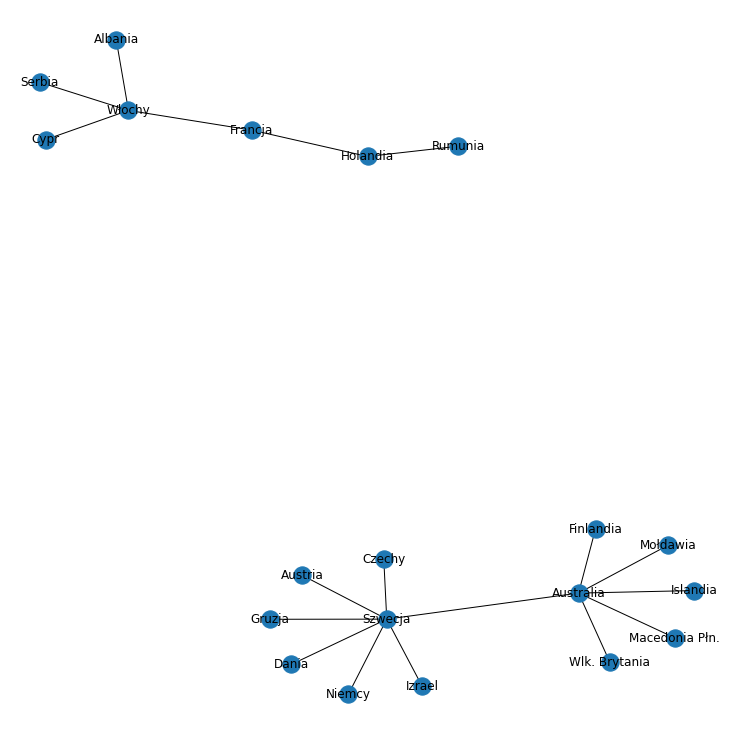

In [ ]:
#druga metoda: Louvain method dla Jury

import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx


#first compute the best partition
partition = community_louvain.best_partition(G)

# compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.planar_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
#nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
 #                      cmap=cmap, node_color=list(partition.values()))
#nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.figure(3,figsize=(10,10)) 
nx.draw(G, with_labels = True)

#plt.show()

# Wnioski

Nasza analiza nie doprowadziła nas do jednoznacznych wniosków. Co prawda wciąż istnieją koalicje między państwami, jednak w porównaniu z tymi z poprzednich lat (zwłaszcza z analizami lat 2001-2004), związki te nie są na tyle silne oraz liczne, żeby mogły doprowadzić do gwałtownej zmiany. 


Nasza analiza pokazała natomiast, że w ostatnich konkursach wciąż zachowały się zależności pojawiające się w poprzednich edycjach konkursu (mowa tu głównie o relacjach Grecja-Cypr oraz bloku państw skandynawskich Norwegia-Szwecja-Dania).

Co ciekawe, o wiele bardziej skomplikowane struktury powstały w wyniku analizy głosów telewidzów. Tam również zachowało się najwięcej dawnych sojuszy. Oznacza to, że są oni bardziej skłonni do stronniczego głosowania na Eurowizji.


Analiza pozostałych comunities:


*   Serbia-Chorwacja-Macedonia Płn.-Słowenia-Szwajcaria: wszystkie te kraje są krajami byłej Jugosławii, a w Szwajcarii mniejszość bałkańska jest bardzo liczna.
*   Włochy-Hiszpania-Portugalia: są to kraje południowej Europy



# Referencje

Dane: https://eurovision.tv/events

Artykuł Gatherera: http://jasss.soc.surrey.ac.uk/9/2/1.html

Artykuł, którym się inspirowaliśmy: https://towardsdatascience.com/eurovision-monte-carlo-analysis-and-the-detection-of-tactical-voting-8d5fe04acb99

Interpretowany kod: https://github.com/InternetGareth/EuroVision/blob/master/Euro.ipynb
